In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

plt.rcdefaults()

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omega_index = 0 # while we debug, we confine our attention to just one value
onh2 = spectra.omegas_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [4]:
# It's a waste of time to consider all of the omegas and snapshots, so we're
# making heavy use of skips.
spec_sims = spectra.better_battery(spectra.omegas_nu, spectra.omnu_strings,
    skips_omega = [1, 2], skips_model=[8], skips_snapshot=[1, 2, 3],
    h_units=False)

In [5]:
%%capture
fig, axs = plt.subplots()

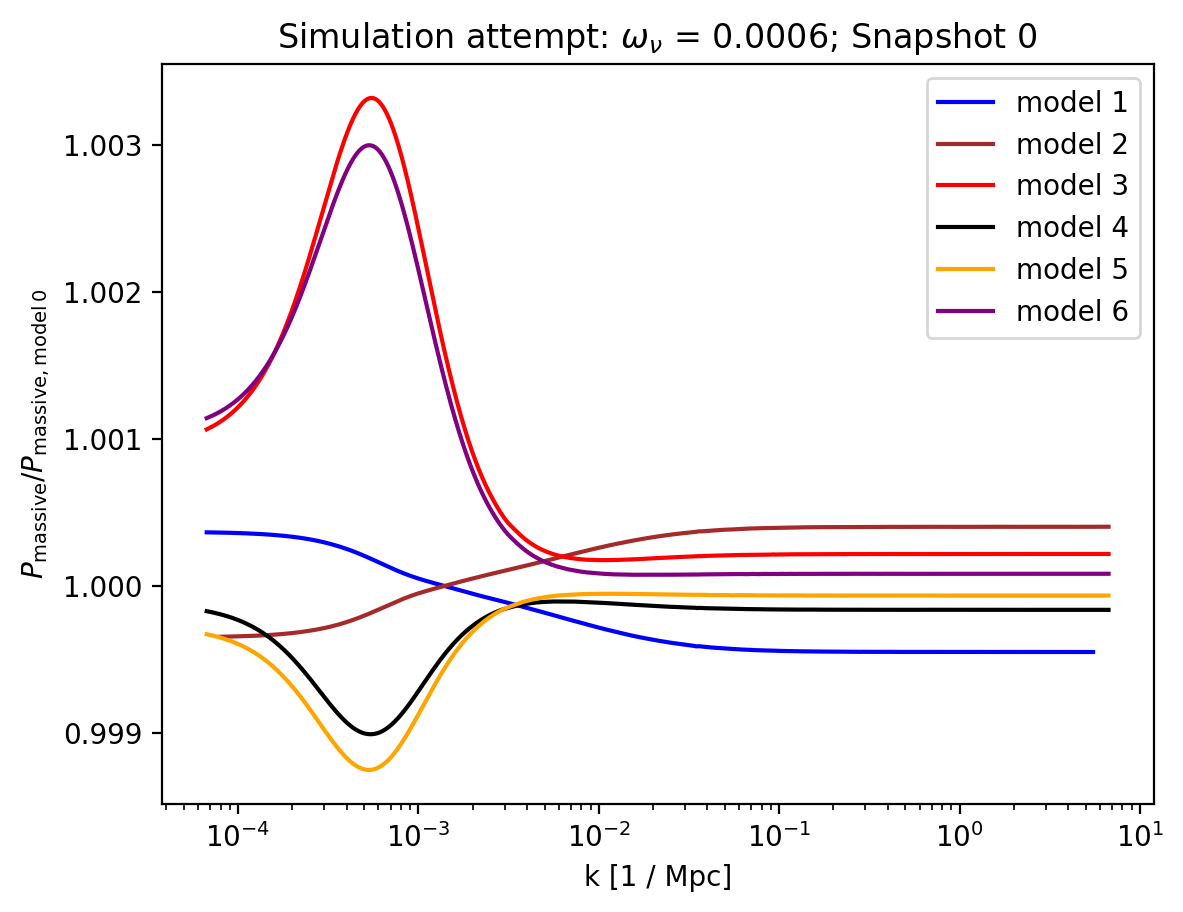

In [6]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spec_sims[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str, title="Simulation attempt")

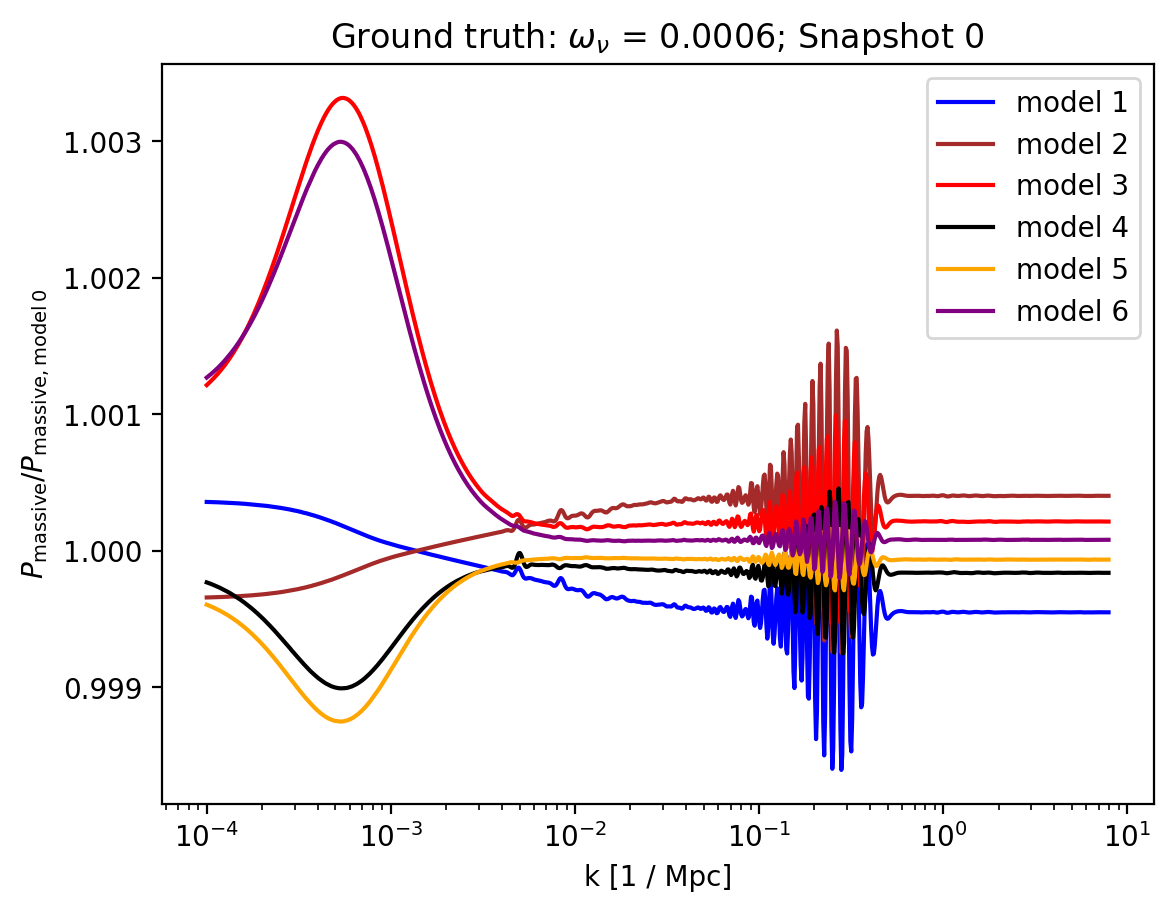

In [7]:
# What was this supposed to look like?
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spectra.powernu[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str)

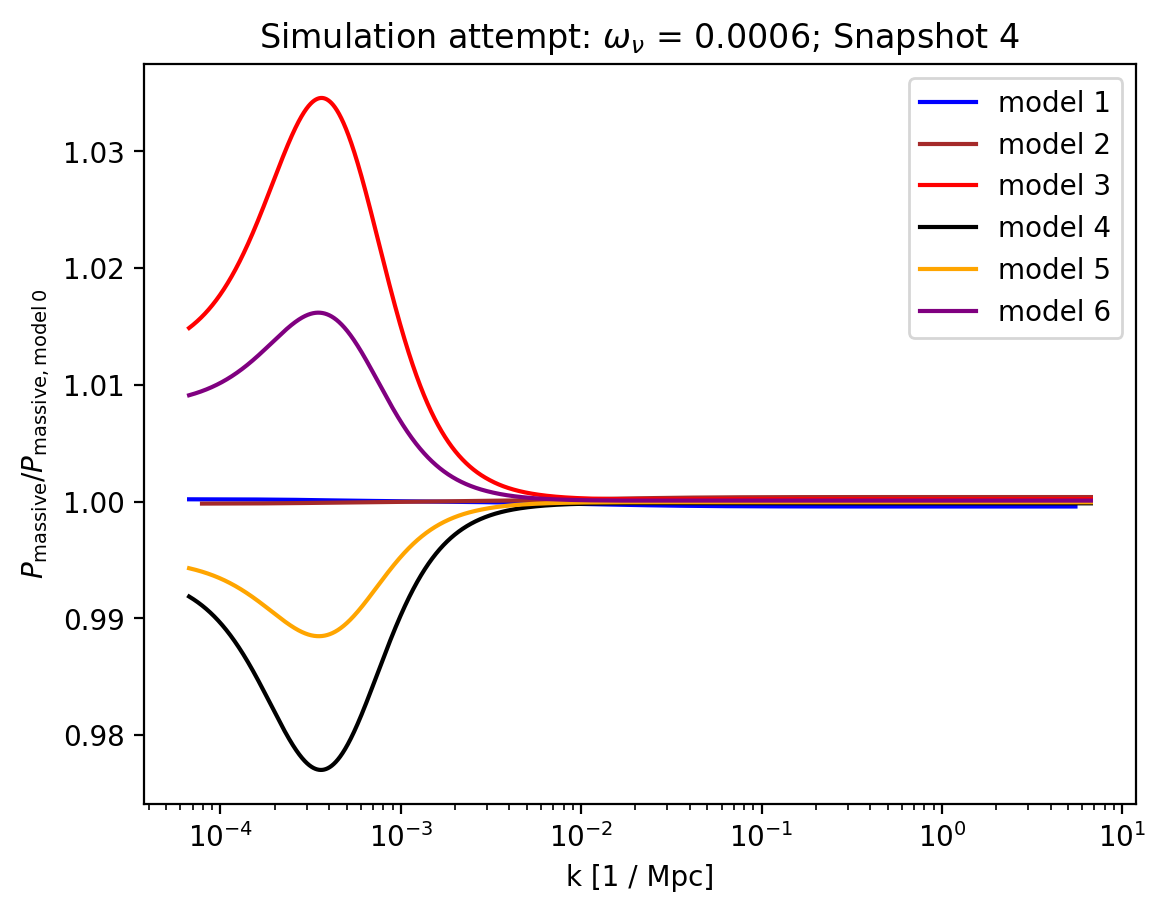

In [8]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=True, skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt")

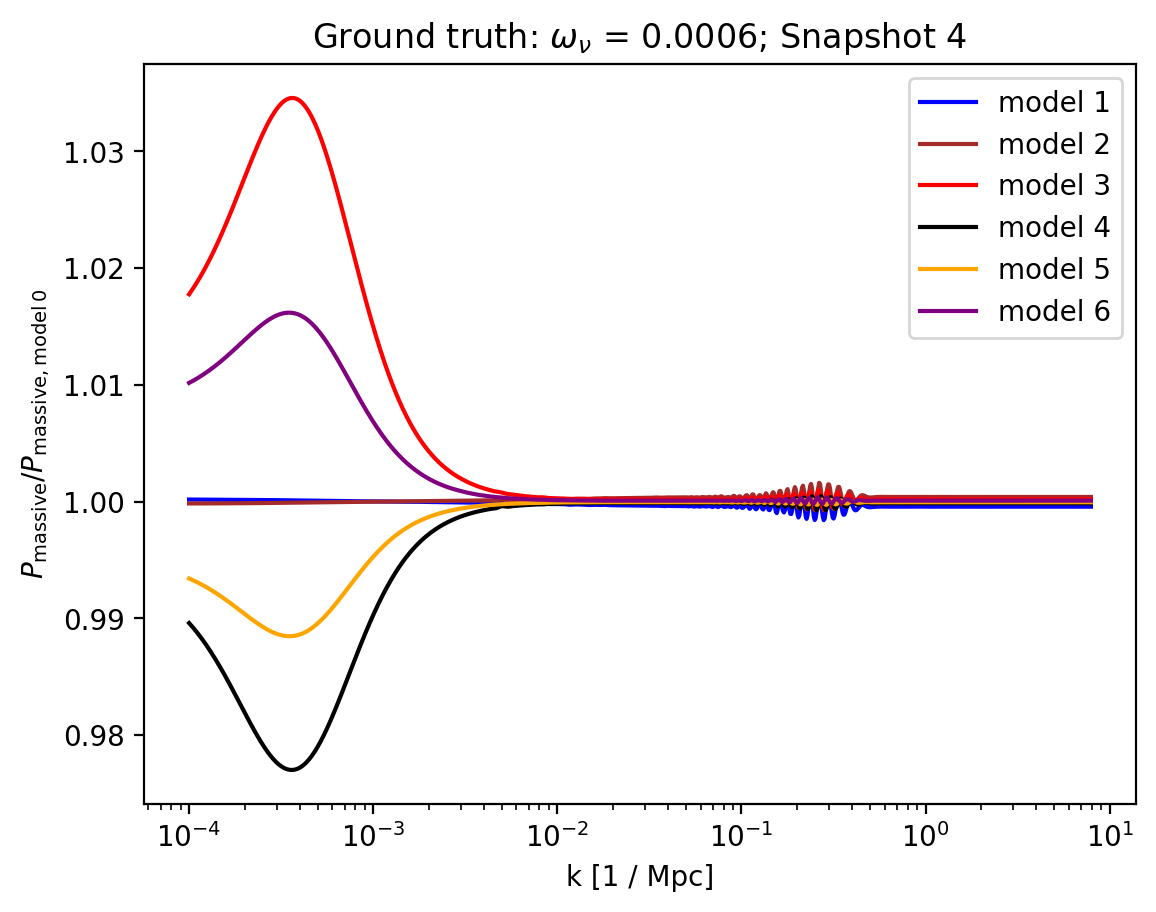

In [9]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive=True, skips=[7, 8], omnuh2_str=onh2_str);

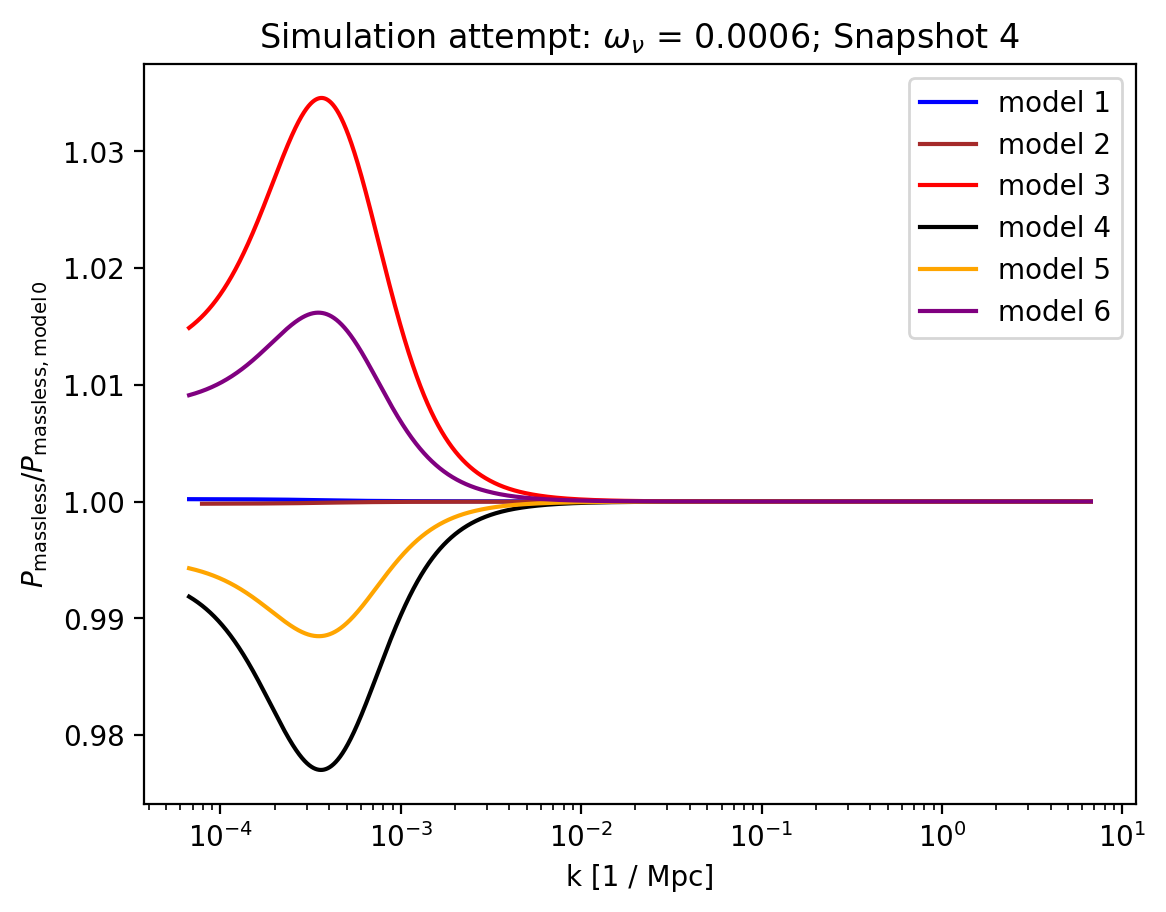

In [10]:
fig, axs = plt.subplots()
_, _ = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive=False,
    skips=[7, 8], omnuh2_str=onh2_str, title="Simulation attempt")

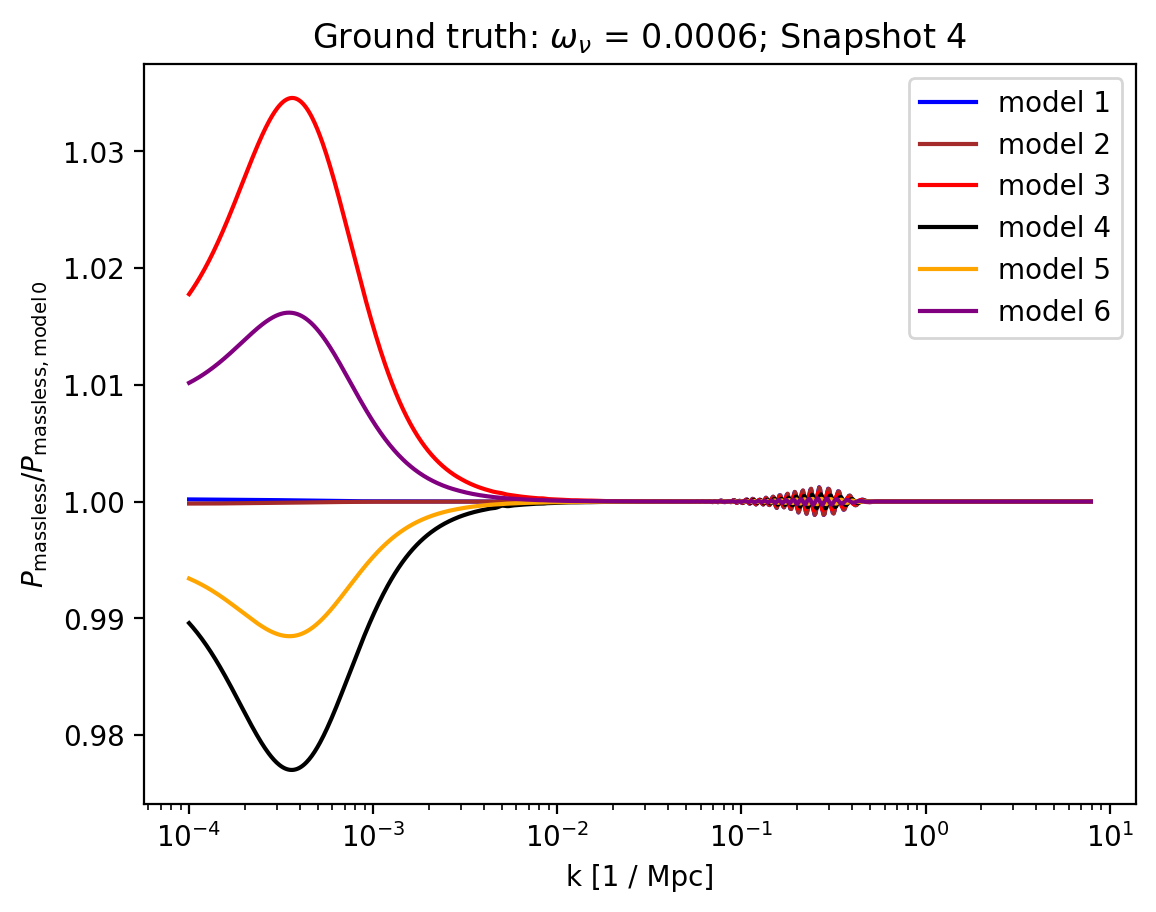

In [11]:
fig, axs = plt.subplots()
_, _ = spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive=False, skips=[7, 8], omnuh2_str=onh2_str)

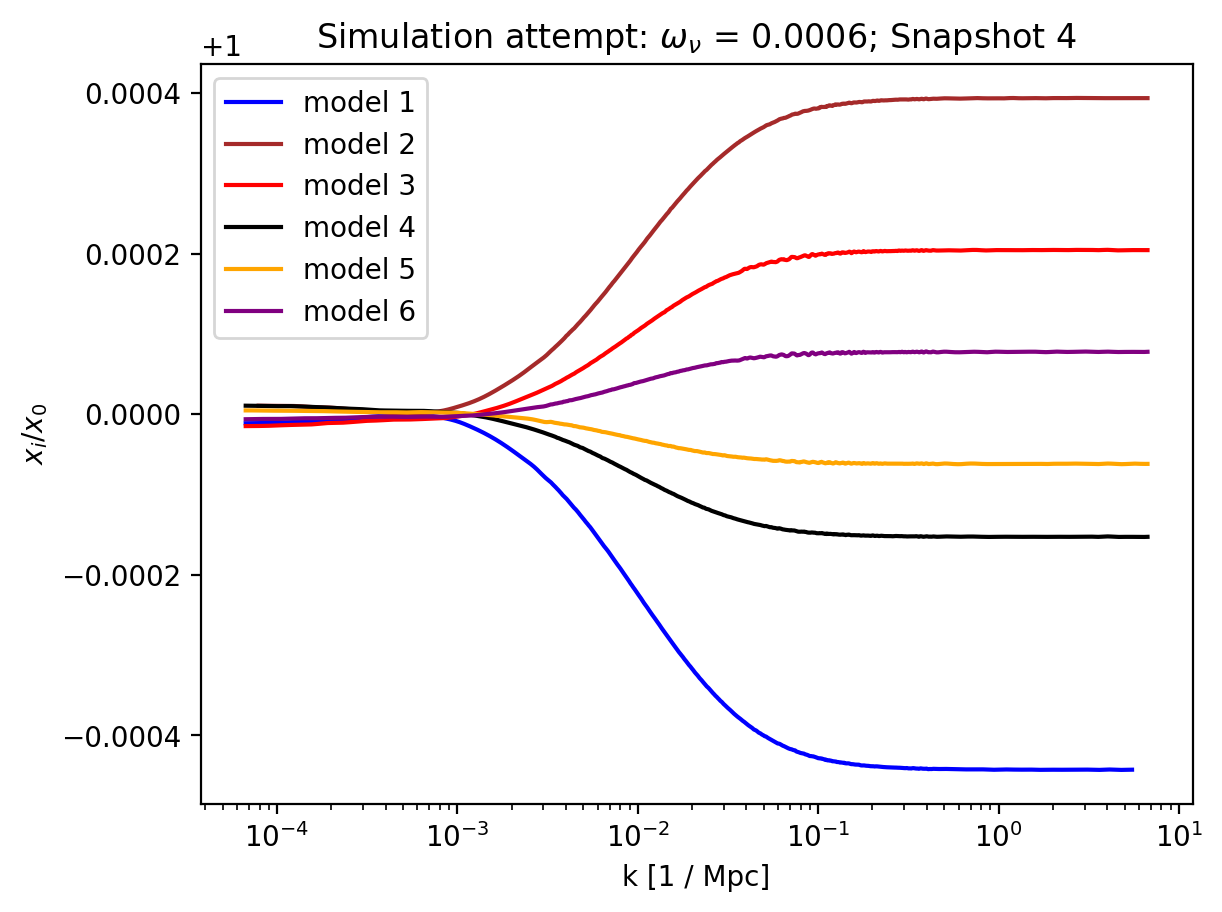

In [12]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(
    4, spec_sims[onh2_str], axs, massive='x', skips=[7, 8], omnuh2_str=onh2_str,
    title="Simulation attempt")

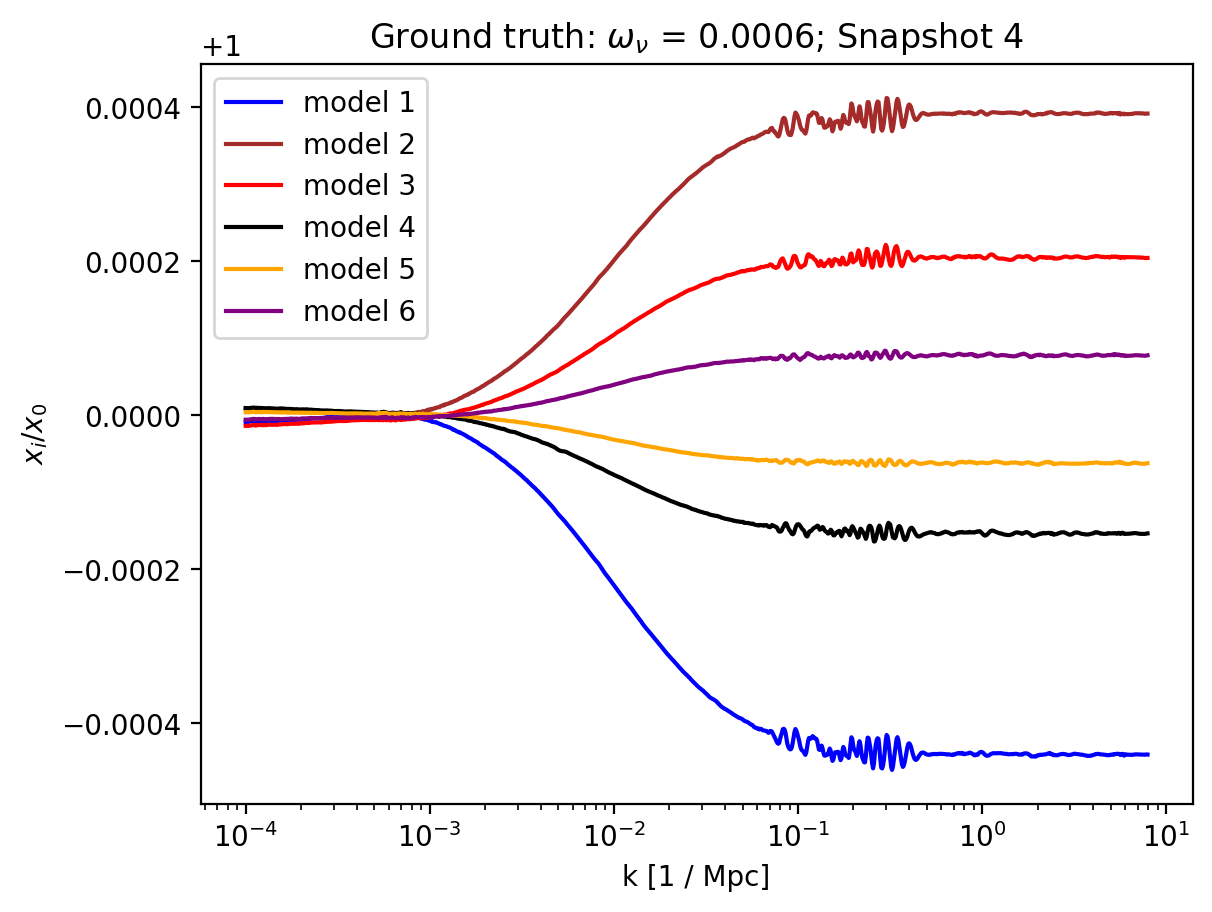

In [13]:
fig, axs = plt.subplots()
spectra.model_ratios_true(4, spectra.powernu[onh2_str], axs,
    massive='x', skips=[7, 8], omnuh2_str=onh2_str);

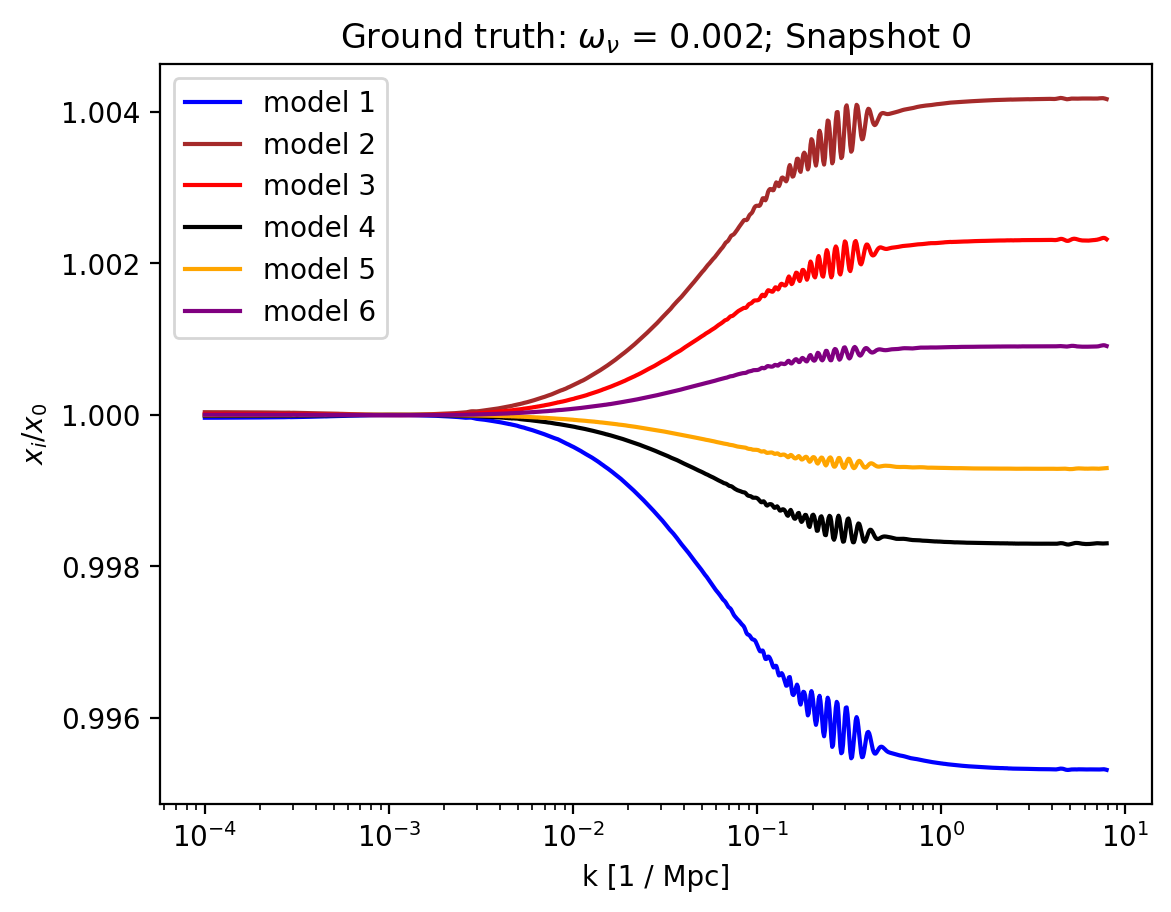

In [14]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(0, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002");

In [54]:
# Be careful with the indexing here; rats[0] is the ratio of model 1 to model 0
true_asymptotes = np.array([rats[i][len(rats[i]) - 1] for i in range(len(rats))])
zc_asymptotes = true_asymptotes - 1

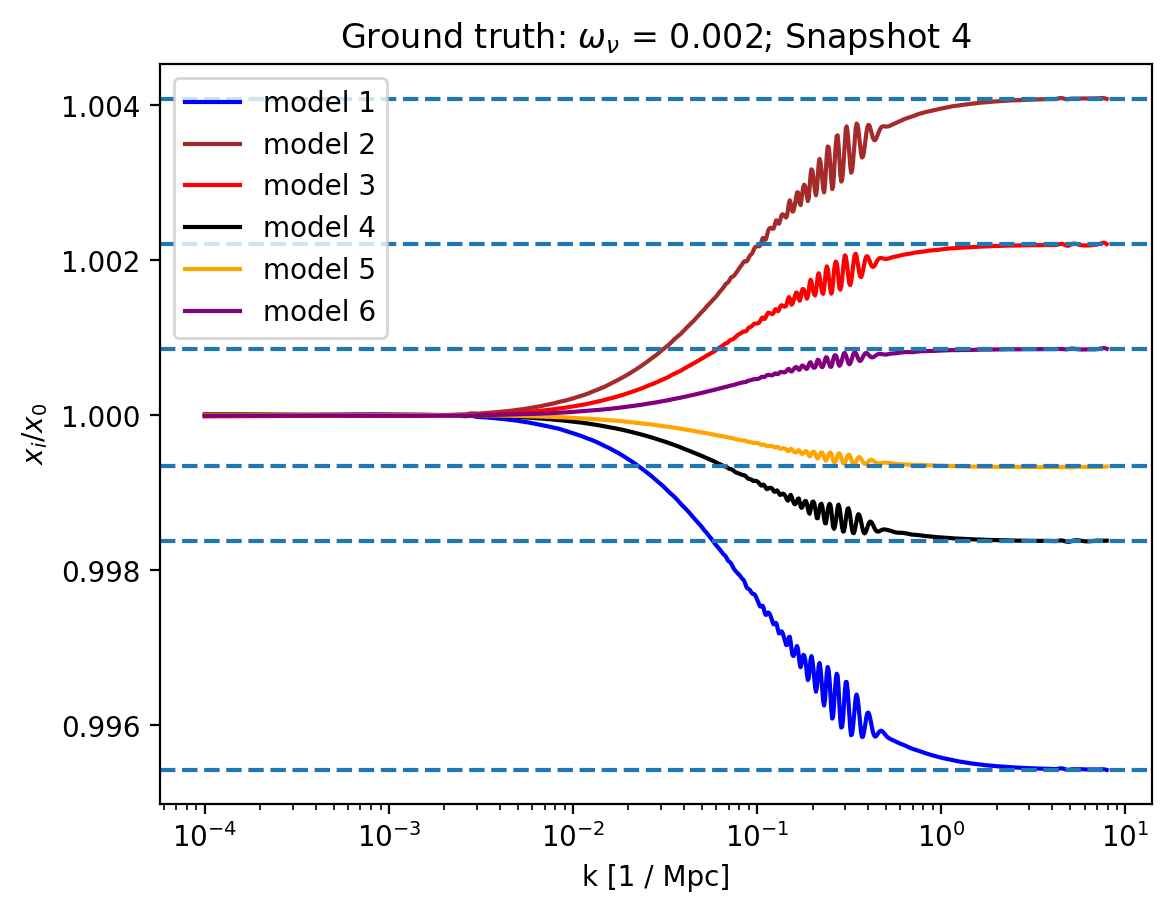

In [55]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002")
for asymptote in true_asymptotes:
    axs.axhline(asymptote, linestyle='--')

In [29]:
np.mean(true_asymptotes)

1.0000529246832341

0.9737591129069547
41.05227096545031
[0.00070122 0.00069684 0.00068946 0.000681   0.00067921 0.00068392]


Text(0.5, 1.0, 'Fit results: $\\hat{y} = C \\omega_\\nu \\, \\frac{A_s^i}{A_s^0}$')

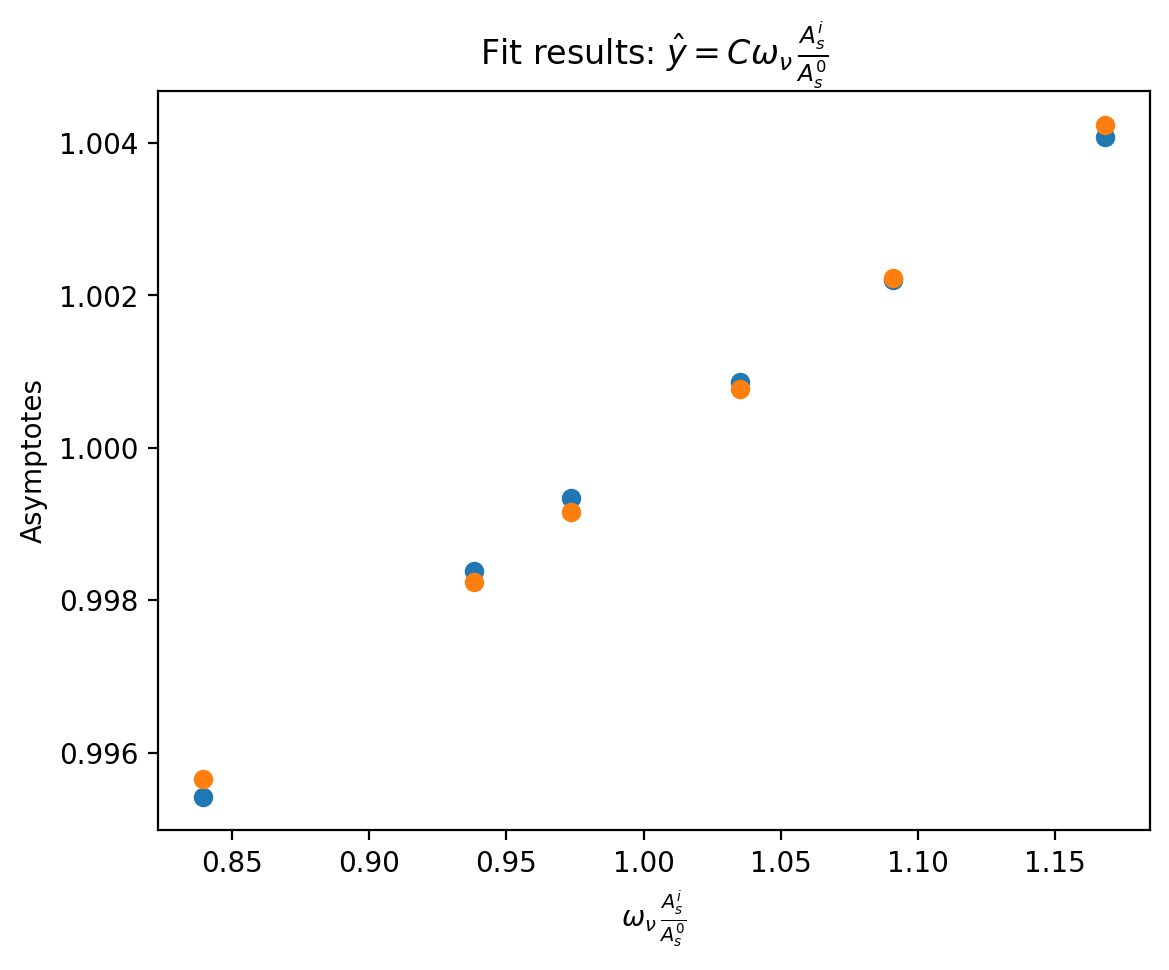

In [101]:
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(7)]
from numpy.polynomial.polynomial import polyfit

plt.scatter(A_s[1:] / A_s[0], true_asymptotes)

b, m = polyfit(onh2 * (A_s[1:] / A_s[0]), true_asymptotes, 1)
plt.scatter(A_s[1:] / A_s[0], m * onh2 * (A_s[1:] / A_s[0]) + b)
#plt.scatter(A_s[1:] / A_s[0], m * onh2 * (A_s[1:] / A_s[0]) + 1)
print(b)
print(m)
print(np.square(true_asymptotes - m * onh2 * (A_s[1:] / A_s[0]) - 1))

plt.ylabel("Asymptotes")
plt.xlabel(r"$\omega_\nu \, \frac{A_s^i}{A_s^0}$")
plt.title(r"Fit results: $\hat{y} = C \omega_\nu \, \frac{A_s^i}{A_s^0}$")

In [56]:
x = onh2 * (A_s[1:] / A_s[0])
X = np.vstack((x, x)).T
print(X[:, 1])
print(X)
linear_offsetless_fit = np.linalg.lstsq(X[:, :-1], zc_asymptotes)[0]
asymptote_predictions = np.dot(linear_offsetless_fit, X[:, :-1].T)

[0.00053355 0.00074245 0.00069341 0.00059625 0.00061873 0.00065793]
[[0.00053355 0.00053355]
 [0.00074245 0.00074245]
 [0.00069341 0.00069341]
 [0.00059625 0.00059625]
 [0.00061873 0.00061873]
 [0.00065793 0.00065793]]


/tmp/ipykernel_28496/2344097331.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  linear_offsetless_fit = np.linalg.lstsq(X[:, :-1], zc_asymptotes)[0]


In [72]:
from sklearn.linear_model import LinearRegression
reg_b0 = LinearRegression()
reg_b0.fit_intercept=False
X = x.reshape(-1, 1)
fit_b0 = reg_b0.fit(X, zc_asymptotes)
m = fit_b0.coef_[0]
print(m, b)

0.5263368636971071 0.0


In [73]:
from sklearn.linear_model import LinearRegression
reg_b1 = LinearRegression()
reg_b1.fit_intercept=True
X = x.reshape(-1, 1)
fit_b1 = reg_b1.fit(X, zc_asymptotes)
m = fit_b1.coef_[0]
b = reg.intercept_
print(m, b)

41.05227096545041 0.0


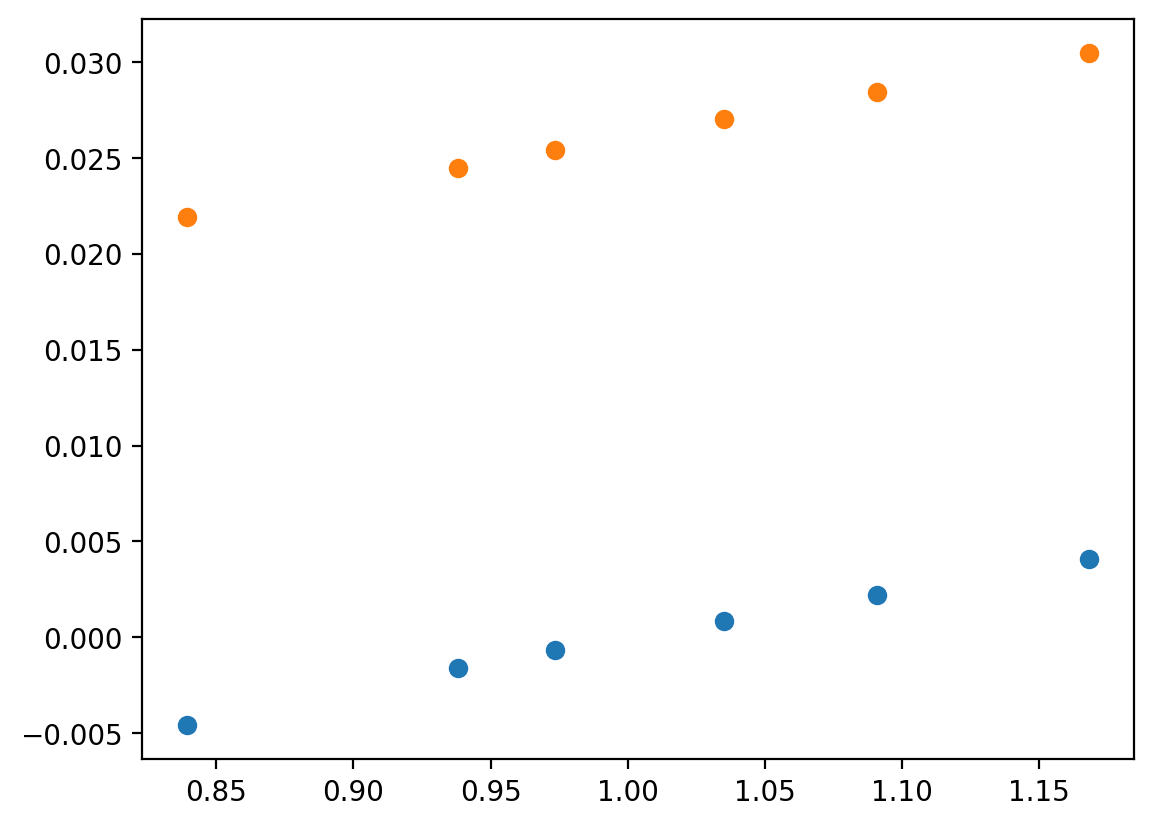

In [75]:
plt.scatter(A_s[1:] / A_s[0], zc_asymptotes)
plt.scatter(A_s[1:] / A_s[0], m * onh2 * (A_s[1:] / A_s[0]) + b)

In [21]:
C = m

In [24]:
predicted_asymptotes = C * onh2 * (A_s[1:] / A_s[0])
predicted_asymptotes

array([0.02252143, 0.03133957, 0.02926929, 0.02516813, 0.02611699,
       0.02777164])

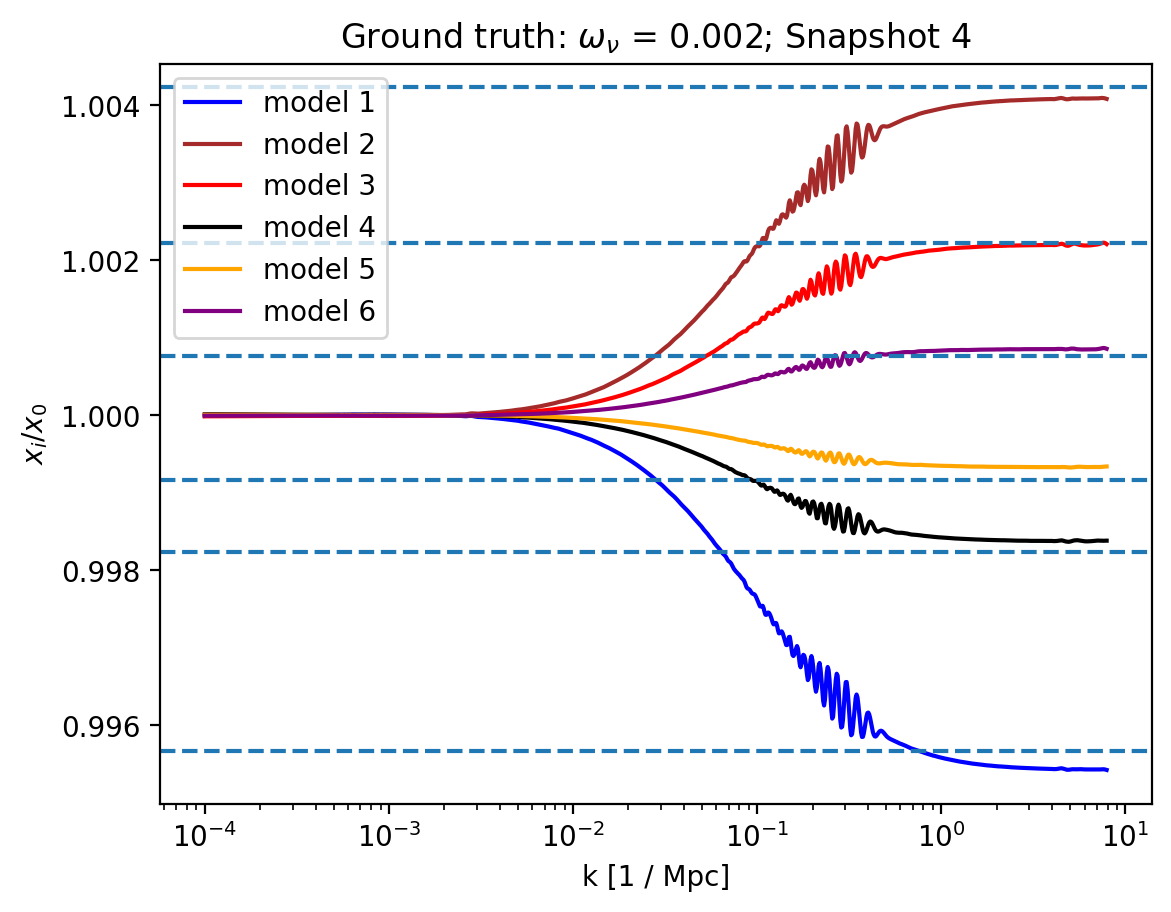

In [81]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002")
#for asymptote in predicted_asymptotes:
#    axs.axhline(asymptote, linestyle='--')
#axs.axhline(predicted_asymptotes[1], linestyle='--')
for i in range(len(true_asymptotes)):
    axs.axhline(m * onh2 * (A_s[i + 1] / A_s[0]) + b, linestyle='--')

0.9477284776667535
82.12296142516986


Text(0.5, 1.0, 'Fit results: $\\hat{y} = C \\omega_\\nu \\, \\sqrt{\\frac{A_s^i}{A_s^0}}$')

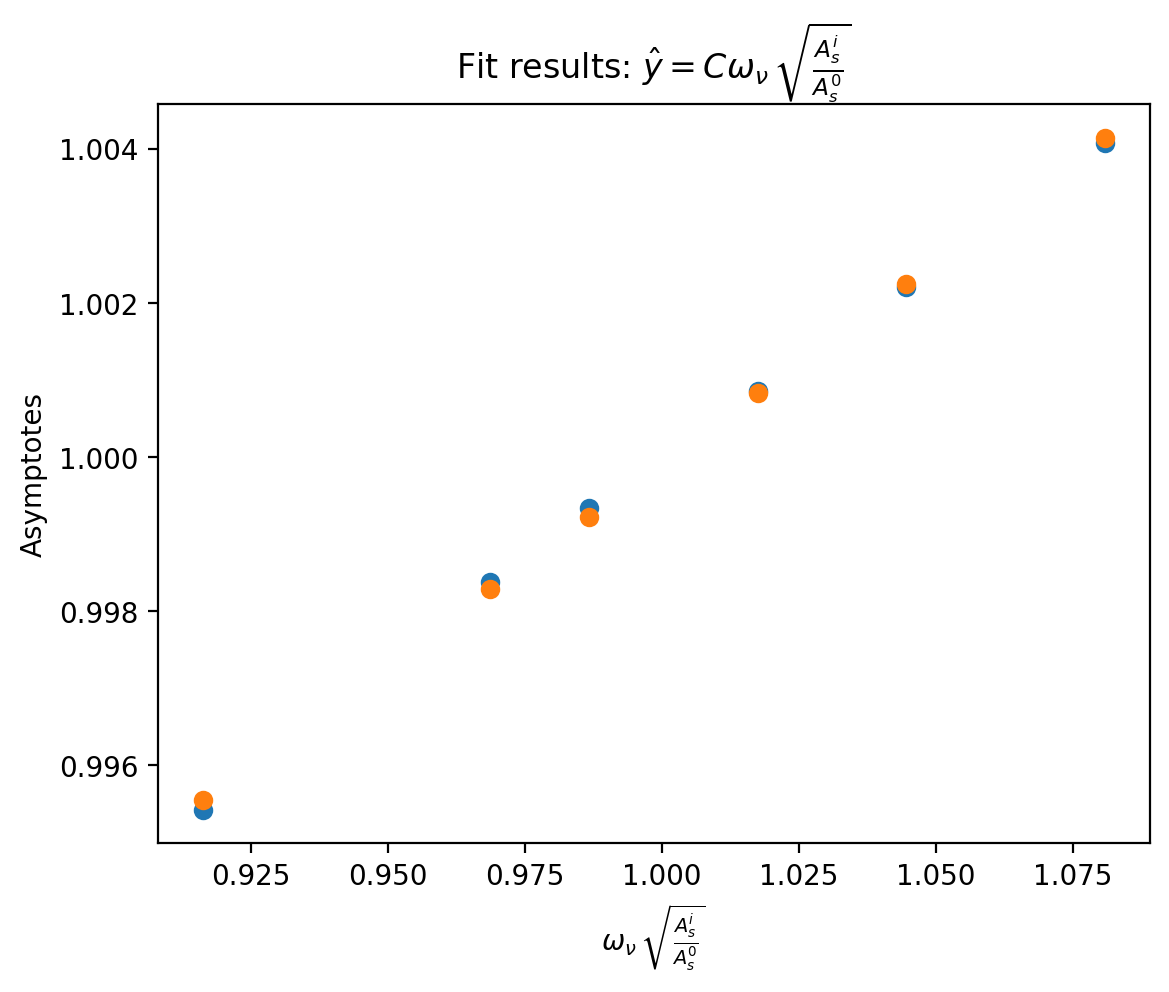

In [100]:
A_s = [spectra.cosm.loc[i]["A_s"] for i in range(7)]
from numpy.polynomial.polynomial import polyfit

plt.scatter(np.sqrt(A_s[1:] / A_s[0]), true_asymptotes)

bprime, mprime = polyfit(onh2 * np.sqrt(A_s[1:] / A_s[0]), true_asymptotes, 1)
plt.scatter(np.sqrt(A_s[1:] / A_s[0]), mprime * onh2 * \
    np.sqrt(A_s[1:] / A_s[0]) + bprime)
#plt.scatter(A_s[1:] / A_s[0], m * onh2 * (A_s[1:] / A_s[0]) + 1)
print(bprime)
print(mprime)

plt.ylabel("Asymptotes")
plt.xlabel(r"$\omega_\nu \, \sqrt{\frac{A_s^i}{A_s^0}}$")
plt.title(r"Fit results: $\hat{y} = C \omega_\nu \, \sqrt{\frac{A_s^i}{A_s^0}}$")

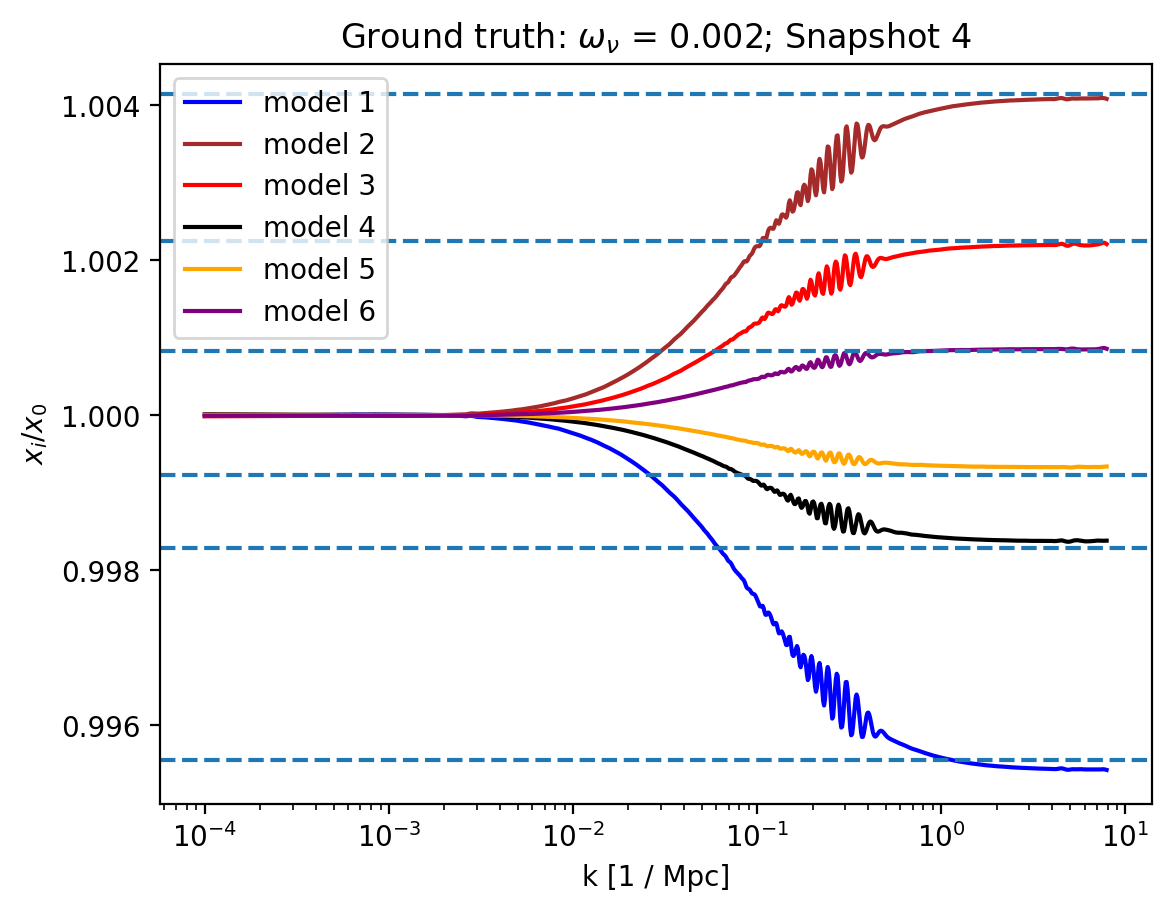

In [86]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002")
#for asymptote in predicted_asymptotes:
#    axs.axhline(asymptote, linestyle='--')
#axs.axhline(predicted_asymptotes[1], linestyle='--')
for i in range(len(true_asymptotes)):
    axs.axhline(mprime * onh2 * np.sqrt(A_s[i + 1] / A_s[0]) + bprime, \
        linestyle='--')

0.9477284776667535
82.12296142516986


Text(0.5, 1.0, 'Fit results: $\\hat{y} = C \\omega_\\nu \\, \\frac{A_s^i}{A_s^0}$')

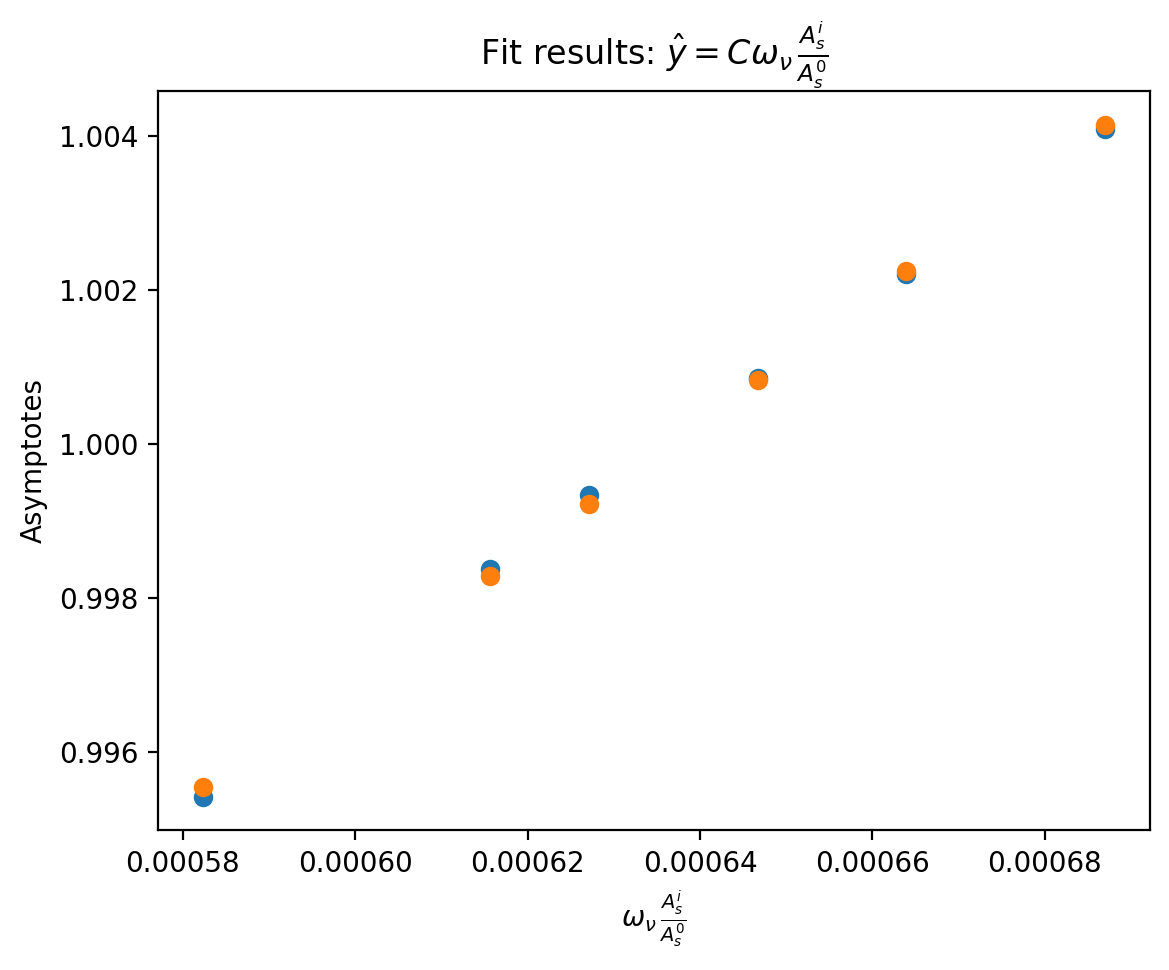

In [97]:
x = onh2 * np.sqrt(A_s[1:] / A_s[0])

A_s = [spectra.cosm.loc[i]["A_s"] for i in range(7)]
from numpy.polynomial.polynomial import polyfit

plt.scatter(x, true_asymptotes)

bpp, mpp = polyfit(x, true_asymptotes, 1)
plt.scatter(x, mpp * x + bpp)
#plt.scatter(A_s[1:] / A_s[0], m * onh2 * (A_s[1:] / A_s[0]) + 1)
print(bpp)
print(mpp)

plt.ylabel("Asymptotes")
plt.xlabel(r"$\omega_\nu \, \frac{A_s^i}{A_s^0}$")
plt.title(r"Fit results: $\hat{y} = C \omega_\nu \, \frac{A_s^i}{A_s^0}$")

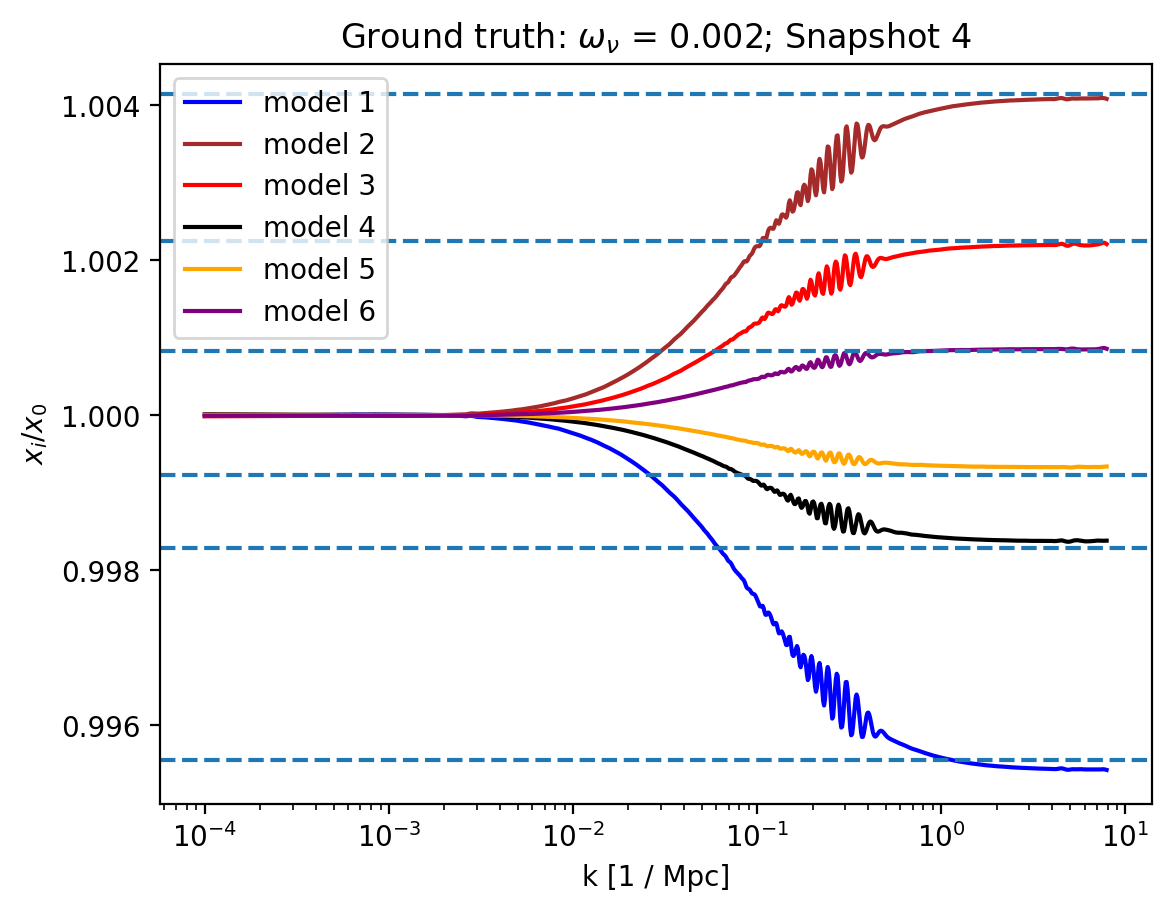

In [88]:
fig, axs = plt.subplots()
ks, rats = spectra.model_ratios_true(4, spectra.powernu2, axs,
    massive='x', skips=[7, 8], omnuh2_str="0.002")
#for asymptote in predicted_asymptotes:
#    axs.axhline(asymptote, linestyle='--')
#axs.axhline(predicted_asymptotes[1], linestyle='--')
for i in range(len(true_asymptotes)):
    axs.axhline(mpp * onh2 * np.sqrt(A_s[i + 1] / A_s[0]) + bpp, \
        linestyle='--')

## 